<a href="https://colab.research.google.com/github/lsmanoel/PowerEletronics/blob/master/heatsink/heatsink_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de Dissipador
Lucas Seara Manoel e Diogo Tavares


![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/circuito_conversorBuck.png)

# Cálculos Preliminares:
$$DutyCycle: D = \frac{V_{out}}{V_{in}}$$
$$I_{out} = \frac{P}{V_{out}}$$ 
$$R_{load} = \frac{V_{out}}{I_{out}}$$
$$\Delta I_L = \frac{V_{out}(1-D)}{fL}$$
$$\Delta V_{out} = \frac{V_{out}(1-D)}{8CLf²}$$

In [124]:
v_in = 36
v_out = 12
L=500e-6
C=100e-6
P=100

f=50e3
duty_cycle = v_out/v_in
i_out = P/v_out
R_load = v_out/i_out
delta_iL = (v_out*(1-duty_cycle))/(f*L)
delta_vout = (v_out*(1-duty_cycle))/(8*C*L*f**2)
print('f:', f, 'Hz')
print('Duty Cycle:', duty_cycle)
print('i_out:', i_out, 'A')
print('R_load:', R_load, 'ohns')
print('delta_iL:', delta_iL, 'A')
print('delta_vout:', delta_vout, 'V')

print('\n')

f=100e3
duty_cycle = v_out/v_in
i_out = P/v_out
R_load = v_out/i_out
delta_iL = (v_out*(1-duty_cycle))/(f*L)
delta_vout = (v_out*(1-duty_cycle))/(8*C*L*f**2)
print('f:', f, 'Hz')
print('Duty Cycle:', duty_cycle)
print('i_out:', i_out, 'A')
print('R_load:', R_load, 'ohns')
print('delta_iL:', delta_iL, 'A')
print('delta_vout:', delta_vout, 'V')

f: 50000.0 Hz
Duty Cycle: 0.3333333333333333
i_out: 8.333333333333334 A
R_load: 1.44 ohns
delta_iL: 0.32 A
delta_vout: 0.007999999999999998 V


f: 100000.0 Hz
Duty Cycle: 0.3333333333333333
i_out: 8.333333333333334 A
R_load: 1.44 ohns
delta_iL: 0.16 A
delta_vout: 0.0019999999999999996 V


# Formas de Onda

**Corrente no Indutor:**

8.413333333333334 8.253333333333334


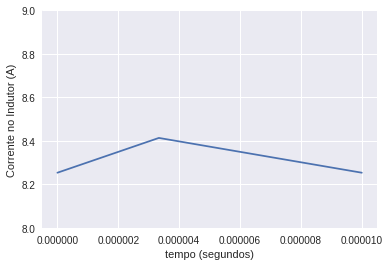

In [125]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
i = np.zeros(plot_size)

i_max = i_out + delta_iL/2
i_min = i_out - delta_iL/2
print(i_max, i_min)

i[:int(plot_size*duty_cycle)] =(delta_iL)/(T*duty_cycle)*t[:int(plot_size*duty_cycle)] + i_min
  
i[int(plot_size*duty_cycle):]=(-delta_iL)/(T*(1-duty_cycle))*t[:int(plot_size*(1-duty_cycle))+1]  + i_max

plt.xlabel('tempo (segundos)')
plt.ylabel('Corrente no Indutor (A)')
plt.ylim([8, 9])
plt.plot(t, i)


**Corrente na Chave:**

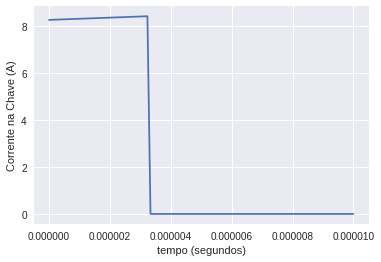

In [126]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
i = np.zeros(plot_size)

i_max = i_out + delta_iL/2
i_min = i_out - delta_iL/2

i[:int(plot_size*duty_cycle)] =(delta_iL)/(T*duty_cycle)*t[:int(plot_size*duty_cycle)] + i_min
  
plt.xlabel('tempo (segundos)')
plt.ylabel('Corrente na Chave (A)')
plt.plot(t, i)

**Tensão na Chave:**

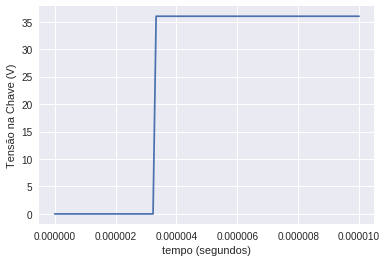

In [127]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
v = np.zeros(plot_size)

v[int(plot_size*duty_cycle):] = v_in
  
plt.xlabel('tempo (segundos)')
plt.ylabel('Tensão na Chave (V)')
plt.plot(t, v)

**Corrente no Diodo:**

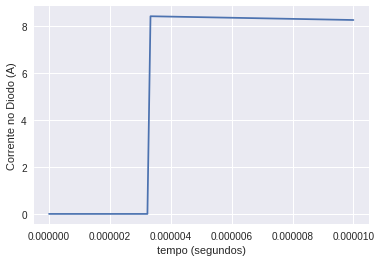

In [128]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
i = np.zeros(plot_size)

i_max = i_out + delta_iL/2
i_min = i_out - delta_iL/2

i[int(plot_size*duty_cycle):]=(-delta_iL)/(T*(1-duty_cycle))*t[:int(plot_size*(1-duty_cycle))+1]  + i_max

plt.xlabel('tempo (segundos)')
plt.ylabel('Corrente no Diodo (A)')
plt.plot(t, i)

**Tensão no Diodo:**

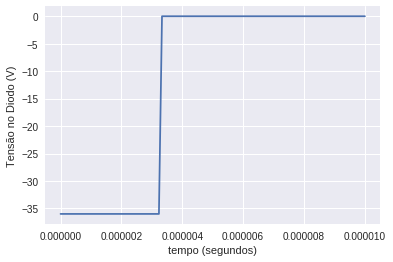

In [129]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
v = np.zeros(plot_size)

v[:int(plot_size*duty_cycle)] = -v_in
  
plt.xlabel('tempo (segundos)')
plt.ylabel('Tensão no Diodo (V)')
plt.plot(t, v)

---
# Simulação

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/circuito.PNG)

**f=50 kHz:**

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/ondas.PNG)

**f=100 kHz:**

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/ondas_100k.PNG)

**Valores Médios:**

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/medios.PNG)

**Valores RMS:**

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/keys_rms.PNG)

**Valores de Pico:**

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/keys_pk_50k.PNG)


---
# Cálculo de Dissipador

**Perdas por condução:**

$$P_{cond} = R_{DS(ON)}{I_{s_{ef}}}²$$

**Perdas por comutação:**

$$P_{com}=\frac{f}{2}(t_r + t_f)I_{DS(ON)}V_{DS(OFF)}$$

**Perdas Total:**

$$P = P_{cond} + P_{com}$$

**Resistência Térmica:**


*   $R_{ja}$: Junção -> Ambiente
*   $R_{jc}$: Junção -> Encapsulamento
*   $R_{cd}$: Encapsulamento -> Dissipador
*   $R_{da}$: Dissipador -> Ambiente

Resistência térmica máxima para a temperatura da junção e ambiente definidas:
$$R_{ja}=\frac{T_j - T_a}{P}$$

Resistência térmica série do conjunto de elementos entre a junção e o ambiente:
$$R_{ja}=R_{jc}+R_{cd}+R_{da}$$



[Referência](https://electronics.stackexchange.com/questions/16956/to-220-case-to-sink-thermal-resistance) para o valor de resistência térmica entre o encapsulamento e o dissipador:

$R_{cd} = 0.5$ Cº/W

# Transistor IRLZ44N:

In [130]:
f=50e3
print('f:', f, 'Hz')

Is_ef = 4.73
Rds_on = 0.022
P_cond = Rds_on*Is_ef**2
print('Perdas por condução:', P_cond, 'W')

t_r = 84e-9
t_f = 15e-9
Ids_on = 8.05
Vds_off=v_in
P_com = (f/2)*(t_r+t_f)*Ids_on*Vds_off
P50 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P50, 'W')

print('\n')

f=100e3
print('f:', f, 'Hz')

Is_ef = 4.73
Rds_on = 0.022
P_cond = Rds_on*Is_ef**2
print('Perdas por condução:', P_cond, 'W')

t_r = 84e-9
t_f = 15e-9
Ids_on = 8.05
Vds_off=v_in
P_com = (f/2)*(t_r+t_f)*Ids_on*Vds_off
P100 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P100, 'W')

f: 50000.0 Hz
Perdas por condução: 0.4922038000000001 W
Perdas por comutação: 0.7172550000000002 W
Perdas Totais: 1.2094588000000002 W


f: 100000.0 Hz
Perdas por condução: 0.4922038000000001 W
Perdas por comutação: 1.4345100000000004 W
Perdas Totais: 1.9267138000000004 W


In [131]:
T_a = 50
T_j = 150
R_cd = 0.5
R_jc = 1.4
R_ja = 62

f=50e3
print('f:', f, 'Hz')

R_ja50 = (T_j - T_a)/P50
print('Resistência Junção->Ambiente:', R_ja50, 'grausC/W')

print('\n')

f=100e3
print('f:', f, 'Hz')

R_ja100 = (T_j - T_a)/P100
print('Resistência Junção->Ambiente:', R_ja100, 'grausC/W')

f: 50000.0 Hz
Resistência Junção->Ambiente: 82.68160932807301 grausC/W


f: 100000.0 Hz
Resistência Junção->Ambiente: 51.901844477368655 grausC/W


Apenas para a frequência de 100 kHz é necessário o dissipador.


In [132]:
R_da = R_ja100 - R_jc - R_cd
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

Resistência térmica dissipador->ambiente: 50.00184447736866 grausC/W


**Dissipador escolhido:** 

---
hs3512B com 20 mm

Resistência Térmica: 8,44 ºC / W / 4

Fator de correção para 20 mm: 2.21

$8,44\times2.21=18.65$ Cº/W

[Catálago HS Dissipadores](https://www.hsdissipadores.com.br/catalogo.pdf)

---
EX Series Hearsinks:

Modelo E2A-T220-25E

Resistência Térmica: 16.4ºC / W

[Catálago OHMITE](https://www.mouser.com/datasheet/2/303/sink_ex-1265519.pdf)

# Diodo MUR860:

In [133]:
Is_ef = 6.48
Rd_on = 0.034
t_rr = 70e-9
Id_on = 8.05
Vd_off=v_in

P_cond = Rd_on*Is_ef**2
print('Perdas por condução:', P_cond, 'W')

print('\n')

f=50e3
print('f:', f, 'Hz')
P_com = (f/2)*t_rr*Id_on*Vd_off
P50 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P50, 'W')

print('\n')

f=100e3
print('f:', f, 'Hz')
P_com = (f/2)*t_rr*Id_on*Vd_off
P100 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P100, 'W')

Perdas por condução: 1.4276736000000003 W


f: 50000.0 Hz
Perdas por comutação: 0.50715 W
Perdas Totais: 1.9348236000000003 W


f: 100000.0 Hz
Perdas por comutação: 1.0143 W
Perdas Totais: 2.4419736000000003 W


In [134]:
T_a = 50
T_j = 150
R_cd = 0.5
R_jc = 2
R_ja = 73

f=50e3
print('f:', f, 'Hz')

R_ja50 = (T_j - T_a)/P50
print('Resistência Junção->Ambiente:', R_ja50, 'grausC/W')

print('\n')

f=100e3
print('f:', f, 'Hz')

R_ja100 = (T_j - T_a)/P100
print('Resistência Junção->Ambiente:', R_ja100, 'grausC/W')

f: 50000.0 Hz
Resistência Junção->Ambiente: 51.68429824817104 grausC/W


f: 100000.0 Hz
Resistência Junção->Ambiente: 40.950483657972384 grausC/W


In [135]:
R_da = R_ja50 - R_jc - R_cd
print("f=50 kHz")
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

R_da = R_ja100 - R_jc - R_cd
print("f=100 kHz")
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

f=50 kHz
Resistência térmica dissipador->ambiente: 49.18429824817104 grausC/W
f=100 kHz
Resistência térmica dissipador->ambiente: 38.450483657972384 grausC/W


In [136]:
R_da = R_ja100 - R_jc - R_cd
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

Resistência térmica dissipador->ambiente: 38.450483657972384 grausC/W


**Dissipador escolhido:** 

---
hs3512B com 20 mm

Resistência Térmica: 8,44 ºC / W / 4

Fator de correção para 20 mm: 2.21

$8,44\times2.21=18.65$ Cº/W

[Catálago HS Dissipadores](https://www.hsdissipadores.com.br/catalogo.pdf)

---
EX Series Hearsinks:

Modelo E2A-T220-25E

Resistência Térmica: 16.4ºC / W

[Catálago OHMITE](https://www.mouser.com/datasheet/2/303/sink_ex-1265519.pdf)

# Diodo MRB20100:

In [137]:
Is_ef = 6.48
Rd_on = 0.08
t_rr = 70e-9
Id_on = 8.05
Vd_off=v_in

P_cond = Rd_on*Is_ef**2
print('Perdas por condução:', P_cond, 'W')

print('\n')

f=50e3
print('f:', f, 'Hz')
P_com = (f/2)*t_rr*Id_on*Vd_off
P50 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P50, 'W')

print('\n')

f=100e3
print('f:', f, 'Hz')
P_com = (f/2)*t_rr*Id_on*Vd_off
P100 = P_cond+P_com
print('Perdas por comutação:', P_com, 'W')
print('Perdas Totais:', P100, 'W')

Perdas por condução: 3.359232000000001 W


f: 50000.0 Hz
Perdas por comutação: 0.50715 W
Perdas Totais: 3.8663820000000007 W


f: 100000.0 Hz
Perdas por comutação: 1.0143 W
Perdas Totais: 4.373532000000001 W


Perdas totais analisando o datasheet: 
Aproximadamente $3$ W

$R_{d(on)} = \frac{P}{I²} \simeq 2/25 \simeq 0.08$

![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/MBR20100_fig5_datasheet.png)

[Datasheet](http://pdf1.alldatasheet.com/datasheet-pdf/view/5595/MOTOROLA/MUR860.html)

In [138]:
T_a = 50
T_j = 150
R_cd = 0.5
R_jc = 2.5
R_ja = 60

f=50e3
print('f:', f, 'Hz')

R_ja50 = (T_j - T_a)/P50
print('Resistência Junção->Ambiente:', R_ja50, 'grausC/W')

print('\n')

f=100e3
print('f:', f, 'Hz')

R_ja100 = (T_j - T_a)/P100
print('Resistência Junção->Ambiente:', R_ja100, 'grausC/W')

f: 50000.0 Hz
Resistência Junção->Ambiente: 25.863973089053275 grausC/W


f: 100000.0 Hz
Resistência Junção->Ambiente: 22.86481498249012 grausC/W


In [139]:
R_da = R_ja50 - R_jc - R_cd
print("f=50 kHz")
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

R_da = R_ja100 - R_jc - R_cd
print("f=100 kHz")
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

f=50 kHz
Resistência térmica dissipador->ambiente: 22.863973089053275 grausC/W
f=100 kHz
Resistência térmica dissipador->ambiente: 19.86481498249012 grausC/W


In [140]:
R_da = R_ja100 - R_jc - R_cd
print('Resistência térmica dissipador->ambiente:', R_da, 'grausC/W')

Resistência térmica dissipador->ambiente: 19.86481498249012 grausC/W


**Dissipador escolhido:** 

---

hs3512B com 20 mm

Resistência Térmica: 8,44 ºC / W / 4

Fator de correção para 20 mm: 2.21

$8,44\times2.21=18.65$ Cº/W

[Catálago HS Dissipadores](https://www.hsdissipadores.com.br/catalogo.pdf)

---
EX Series Hearsinks:

Modelo E2A-T220-25E

Resistência Térmica: 16.4ºC / W

[Catálago OHMITE](https://www.mouser.com/datasheet/2/303/sink_ex-1265519.pdf)